In [54]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("D:/Data/Datasets/Titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
df=df.drop(columns='Cabin')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [8]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

<AxesSubplot:>

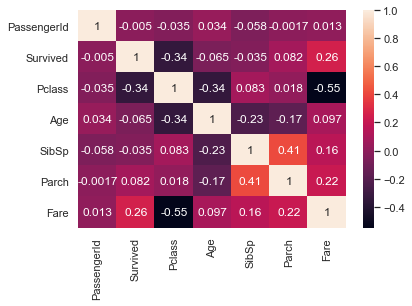

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df=df.drop(columns=['Name','Ticket','PassengerId'])

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})

In [13]:
df['Sex']=df['Sex'].replace({'male':1,'female':0})

In [14]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1


In [15]:
X=df.drop(columns='Survived')
Y=df['Survived']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=1200)

In [17]:
df.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [18]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\harme\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred=lr.predict(x_test)

In [20]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [21]:
accuracy_score(y_test,y_pred)

0.7713004484304933

In [22]:
confusion_matrix(y_test,y_pred)

array([[117,  25],
       [ 26,  55]], dtype=int64)

In [23]:
auc=roc_auc_score(y_test,y_pred)

In [24]:
auc

0.7514780038254216

In [25]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

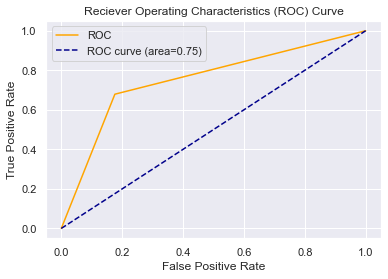

In [26]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend()
plt.show()

In [27]:
f1_score(y_test,y_pred)

0.6832298136645963

In [28]:
auc

0.7514780038254216

### Applying SMOTE

In [29]:
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))



scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_smote)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_smote,test_size=0.25,random_state=0)

log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

Original dataset shape Counter({0: 549, 1: 342})
Resample dataset shape Counter({0: 549, 1: 549})


LogisticRegression()

In [30]:
y_pred = log_reg.predict(x_test)


accuracy_score(y_test,y_pred)

0.8254545454545454

In [31]:
auc = roc_auc_score(y_test,y_pred)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)

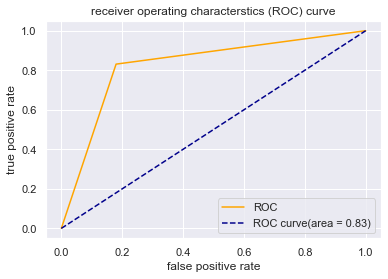

In [32]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

In [33]:
f1_score(y_test,y_pred)

0.8248175182481752

In [34]:
auc

0.8255131189166315